In [20]:
import tensorflow as tf
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns 


In [21]:
# Load Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [22]:
# Normalize and reshape the predictors
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

# Create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

In [23]:
# Define the labels dictionary
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

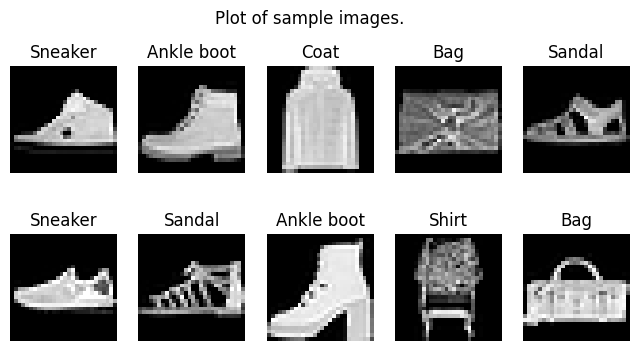

In [24]:
def plot_sample():
    indexes = np.random.randint(0, len(train_x), size=10)
    fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(8, 4))
    axes = axes.flatten()

    for i, index in enumerate(indexes):
        axes[i].imshow(train_x[index].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"{labels[train_y[index]]}")
        axes[i].axis("off")
    fig.suptitle("Plot of sample images.")
    plt.show()

# Call the plot_sample function
plot_sample()

In [25]:
# Define the neural network model
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.input_layer = tf.keras.layers.InputLayer(input_shape=train_x.shape[1:])
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.dense_1 = tf.keras.layers.Dense(20, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(13, activation='relu')
        self.dense_3 = tf.keras.layers.Dense(9, activation='relu')
        self.output_layer = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.input_layer(inputs)
        x = self.dropout(x)
        x = self.batch_norm(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.output_layer(x)

# Create an instance of the model
model = MyModel()

In [26]:
# Compile the model
opt = tf.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Train the model
try:
    # Set the seed for reproducibility
    i = 543
    os.environ['PYTHONHASHSEED'] = str(i)
    tf.random.set_seed(i)
    np.random.seed(i)
    random.seed(i)

    history = model.fit(
        x=train_x,
        y=train_y,
        epochs=275,
        batch_size=700,
        validation_data=(val_x, val_y)
    )

except tf.errors.InvalidArgumentError as e:
    print("InvalidArgumentError:", e)
    print("Invalid label values encountered. Please check label encoding and data preprocessing.")

Epoch 1/275
69/69 [==============================] - 2s 13ms/step - loss: 2.2523 - accuracy: 0.1436 - val_loss: 2.2080 - val_accuracy: 0.1612
Epoch 2/275
69/69 [==============================] - 1s 10ms/step - loss: 1.9745 - accuracy: 0.2389 - val_loss: 1.9720 - val_accuracy: 0.3490
Epoch 3/275
69/69 [==============================] - 1s 9ms/step - loss: 1.7272 - accuracy: 0.3736 - val_loss: 1.6845 - val_accuracy: 0.4703
Epoch 4/275
69/69 [==============================] - 1s 9ms/step - loss: 1.5073 - accuracy: 0.5076 - val_loss: 1.4323 - val_accuracy: 0.5825
Epoch 5/275
69/69 [==============================] - 1s 9ms/step - loss: 1.3254 - accuracy: 0.5748 - val_loss: 1.2468 - val_accuracy: 0.6062
Epoch 6/275
69/69 [==============================] - 1s 10ms/step - loss: 1.1961 - accuracy: 0.5971 - val_loss: 1.1182 - val_accuracy: 0.6257
Epoch 7/275
69/69 [==============================] - 1s 9ms/step - loss: 1.1030 - accuracy: 0.6216 - val_loss: 1.0281 - val_accuracy: 0.6538
Epoch 8/27

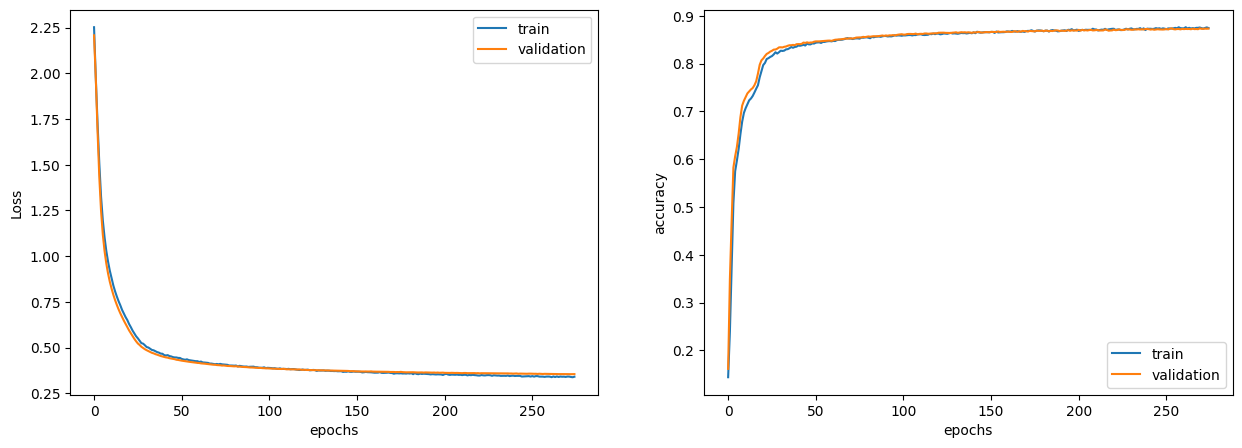

In [28]:
# Plot loss and accuracy
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [29]:
# Evaluate the model on the test set
Y_pred_prob = model.predict(test_x)
Y_pred = np.argmax(Y_pred_prob,axis=1) 
cmat = skm.confusion_matrix(test_y, Y_pred)
cm_df = pd.DataFrame(cmat)

313/313 [==============================] - 0s 980us/step


Text(0.5, 1.0, 'Confusion Matrix - Test Data')

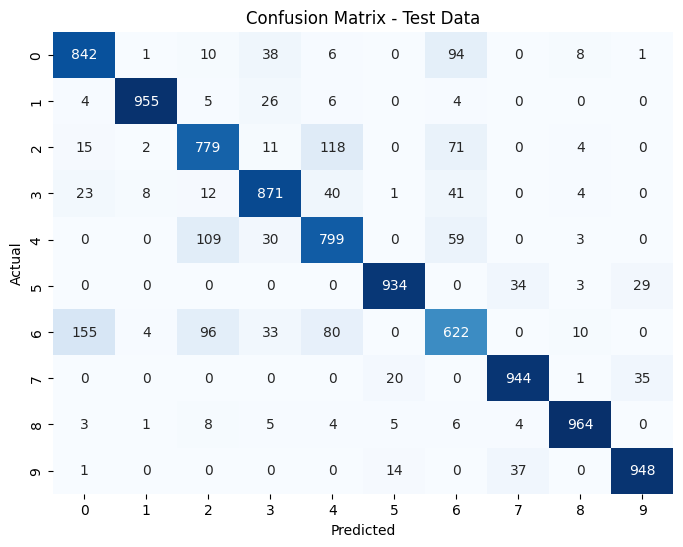

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')



In [31]:
# Calculate and print metrics
accuracy = np.sum(np.diag(cmat)) * 100 / np.sum(cmat)
sensitivity = cmat[1, 1] / (cmat[0, 1] + cmat[1, 1]) * 100
specificity = cmat[0, 0] / (cmat[1, 0] + cmat[0, 0]) * 100

print('Accuracy:', accuracy, "%")
print('Sensitivity:', sensitivity, "%")

Accuracy: 86.58 %
Sensitivity: 99.89539748953975 %
